In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers
from tensorflow.keras import utils
import itertools
import numpy as np
import matplotlib.pyplot as plt

## Step 0
- Get the Boston housing price dataset from keras.
- Use the predefined split into training and test data.

In [2]:
(train_X, train_y), (test_X, test_y) = boston_housing.load_data()

## Step 1
- Use a funnel MLP* with width (𝑤1) 512 and depth (𝑙max ) 2 to predict the house prices.
- Other parameters: RELU activations, MSE, the Adam optimizer, 100 epochs and a batch size of 32.

In [3]:
def create_model(w_1: int, l_max: int) -> models.Sequential:
    model = models.Sequential()

    # Input layer
    model.add(layers.Input(shape=(13,), name='Input'))

    # Middle layers
    for layer in range(l_max):
        units = w_1 / (2 ** layer)
        model.add(layers.Dense(units, activation='relu'))

    # Output layers
    model.add(layers.Dense(1, name='Output'))

    return model

In [4]:
model = create_model(512, 2)
model.compile(optimizer='adam', loss='mse')
history = model.fit(train_X, train_y, batch_size=32, epochs=100, verbose=0)

- Evaluate the NN on the test data.

In [5]:
error = model.evaluate(test_X, test_y, verbose=0)
print(error)

30.036873162961474


## Step 2
- Min-max normalize the features. Then, train the same MLP from step 1. Compare the errors.

In [6]:
X = np.concatenate((train_X, test_X))
X_min = X.min(0)
X_max = X.max(0)
train_X_normalised = (train_X - X_min) / (X_max - X_min)
test_X_normalised = (test_X - X_min) / (X_max - X_min)

In [7]:
model = create_model(512, 2)
model.compile(optimizer='adam', loss='mse')
history = model.fit(train_X_normalised, train_y, batch_size=32, epochs=100, verbose=0)

### Error comparison

In [8]:
error_normalised = model.evaluate(test_X_normalised, test_y, verbose=0)

print('Not normalized:', error)
print('Normalized:', error_normalised)

Not normalized: 30.036873162961474
Normalized: 19.911150764016543


## Step 3
- Use a grid search* to find the best combination of $w_1$ and $l_{max}$ for the normalized data.

In [9]:
batch_size = 32
epochs = 100

losses_dict = dict()

for w_1, l_max in itertools.product((256, 512, 1024), (1, 2, 3)):
    model = create_model(w_1, l_max)
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_X_normalised, train_y, batch_size=batch_size, epochs=epochs, verbose=0)
    
    loss = model.evaluate(test_X_normalised, test_y, verbose=0)
    losses_dict[w_1, l_max] = loss

### Plot results

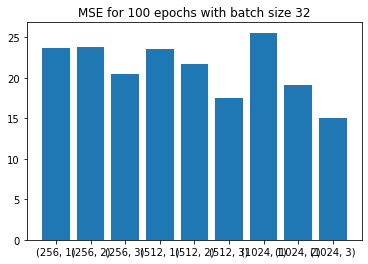

In [10]:
y_pos = np.arange(len(losses_dict))
title, losses = zip(*losses_dict.items())
plt.bar(y_pos, losses)
plt.xticks(y_pos, title)
plt.title(f'MSE for {epochs} epochs with batch size {batch_size}')
plt.show()

### Best combination

In [11]:
print(min(losses_dict, key=losses_dict.get))

(1024, 3)
